# Introduction to $\tt{python}$ - Lesson 2

## Variable scope

Not all variables are accessible from all parts of our program, and not all variables exist for the same amount of time. **We call the part of a program where a variable is accessible its scope**.

A variable which is defined in the main body of a file is called a global variable. It will be visible throughout the file, and also inside any file which imports that file. Global variables can have unintended consequences because of their wide-ranging effects – that is why we should almost never use them (usually they are represented by an uppercase name to be clearly visible). Only objects which are intended to be used globally, like functions and classes, should be put in the global scope.

Global variables can be accessed directly inside a function but cannot be modified. To modify them you have to use the keyword ```global```:

In [ ]:
AGLOBALPARAM = 10

# Here you just use AGLOBALPARAM value, but do not modify it
# param is just a copy of AGLOBALPARAM
def multiplyParam(param): 
    param = param * 10
    return (param)

# Here you actually use AGLOBALPARAM
# you modify it directly
def divideParam():
    global AGLOBALPARAM
    AGLOBALPARAM = AGLOBALPARAM / 10
    return (AGLOBALPARAM)
    
# Here you try to use AGLOBALPARAM but gives you an error
# it is not accessible !
def sumParam():
    AGLOBALPARAM = AGLOBALPARAM + 10
    return (AGLOBALPARAM + x)

print ("AGLOBALPARAM is {} to start.".format(AGLOBALPARAM))
print ("Let's multiply it by 10.")
multiplyParam(AGLOBALPARAM)
print ("AGLOBALPARAM is still {}".format(AGLOBALPARAM))
print ("Let's divide it by 10")
divideParam()
print ("Now AGLOBALPARAM is {}".format(AGLOBALPARAM))
print ("Let's sum it to 10")
sumParam()

A variable which is defined inside a function is local to that function. It is accessible from the point at which it is defined until the end of the function (e.g. the parameter names in the function definition behave like local variables).

In [5]:
# functions with local variable with some name of a global one
# print local variable outside

def func(amax):
    s = 0
    for i in range(amax+1):
        s += i
        
    print (amax, s)
    
amax = 1
func(4)
print (amax)
print (s)

4 10
1


NameError: name 's' is not defined

## Classes

Classes are a key ingredient of *Object Oriented Programming* (OOP) and their concept is implemented in every modern language like `python`, `java`, `C++`.
OOP is a programming model in which programs are organized around data, or objects, rather than functions and logic. 

A class is a blueprint for creating objects (a particular data structure), providing initial values for these objects (member variables or attributes), and implementations their behavior (member functions or methods).

Let's summarize here some terminology:

|     |
| :-: | 
|CLASS~$\rightarrow$~collection of functions that operate on some dataset|
|DATA ITEMS $\rightarrow$ are called the **attributes** of the class|
|CLASS INSTANCE $\rightarrow$ a specific collection of data belonging to the particular object we are representing|
|CLASS FUNCTIONS $\rightarrow$ are called **methods** of the class, and act on **instances**|
 

![Graphical representation of a class instance.](prettycars.png)

The image above shows how a Car object can be the template for many other Car instances. In the image, there are three instances: polo, mini, and beetle. Imagine to have a class called Car, that will structure a Car object to contain information about the car’s model, the color, how many passengers it can hold, its speed, etc. A class can define types of operations that can be performed on a Car object. For example, the Car class might specify an accelerate method, which would update the speed attribute of the car object.

A class is a way of organizing information about a type of data so a programmer can reuse elements when making multiple instances of that data type—for example, if a programmer wanted to make three instances of Car, maybe a BMW, a Ferrari, and a Ford instance. The Car class would allow the programmer to store similar information that is unique to each car (they are different models, and maybe different colors, etc.) and associate the appropriate information with each car.

In [3]:
# class definition
class Person:

SyntaxError: unexpected EOF while parsing (<ipython-input-3-65eb3590a9b1>, line 2)

### The Constructor Method

After declaring the class name, the constructor method must be defined. In $\tt{python}$, this is denoted by `__init__()` regardless the class name. The `__init__` function, as every other method, takes `self` as the first argument, and then any number of arguments as desired by the programmer. The *constructor* allows to specify the initial state of a class by setting the attribute values. For this example that describes a Person, the programmer wants to know the name, the birthday and a job.

The `self `parameter is used to create class attributes. Variables whose name starts with `self` have class scope which means are available within each class method.
To access the arguments and associate them with a particular instance of the class, within the `__init__` method, create variables for each argument like this: `self.variableName = variableName`.

In [1]:
from datetime import date

# this is the class definition
# usually classes use camel naming convention
class Person:
    # the special method __init__ allows to instanciate a class
    # with an initial dataset 
    def __init__(self, name, birthday):
        self.name = name
        self.birthday = birthday     
        self.occupation = None # this attribute not set at instantiation

Now we have a class definition that represent a generic person but we have not yet specialized it to some real person.

In [4]:
me = Person("Matteo", date(1974, 10, 20))
print (type(me))

<class '__main__.Person'>


Essentially when we instantiate a class \texttt{python} first call the `__init__` method and initialise the class attributes with the parameter we are passing.

We haven't yet defined any "person behaviour", so let's add a couple of methods to our class, one computing the person's age and the other setting its occupation.

In [ ]:
# this is the class definition
# usually classes use camel naming convention
class Person:
    # the special method __init__ allows to instanciate a class
    # with an initial dataset 
    def __init__(self, name, birthday):
        self.name = name
        self.birthday = birthday     
        self.employment = None
                
    # this is a normal method and will work on some class attribute
    def age(self, d=date.today()):
        age = (d - self.birthday).days/365
        print ("{} is {:.0f} years old".format(self.name, age))
        
    def mainOccupation(self, occupation):
        self.employment = occupation
        print ("{}'s main occupation is: {}".format(self.name, self.employment))

In [27]:
# to access class attributes or methods you have to use .
me.name

'Matteo'

In [28]:
# calling methods
me.age(date.today())

Matteo is 46 years old


In [29]:
# another instance
her = Person("Francesca", date(2000, 7, 2))
her.age()

Francesca is 20 years old


### Inheritance and Overriding Methods

Inheritance is basically the idea that different classes can have similar components, and in order to avoid repeating code, inheritance is used to link parent classes to descendant classes. For example, in a fantasy story, there are heroes and monsters but both the heroes and the monsters are characters. And both dragons and orcs are monsters. Though dragons and orcs are different monsters, they share some qualities: they both have a color, they both have a size, they both have enemies. Orcs might have characteristics that dragons do not; for example, what kind of weapon does the orc carry? Inheritance allows the classes to share information relevant to multiple parts of the code.

![](inheritance.png)

Inheritance allows code to be reused and reduces the complexity of a program. The derived classes (descendants) override or extend the functionality of base classes (ancestors).

In [15]:
# define a Child and Adult classes
class Adult(Person):
    def __init__(self, name, birthday, drv_license_id):
        Person.__init__(self, name, birthday) # this is a special syntax
        self.drv_license_id = drv_license_id
        
class Child(Person):
    def mainOccupation(self):
        self.employment = "schoolchild"
        print ("{} is a {}".format(self.name, self.employment))

`Adult` class inherets from `Person` and extend it adding a new attribute (driving license id).
`Child` still inherets from `Person` and modify it by setting the only occupation allowed for a child overriding the `mainOccupation` method. 

In [19]:
pippo = Adult("Goofy", date(1936, 1, 1), "A1234")

qui = Child("Huey", date(2014, 10, 9))

In [20]:
pippo.age()
pippo.mainOccupation("Comic's character")

Goofy is 85 years old
Goofy's main occupation is: Comic's character


In [21]:
qui.age()
qui.mainOccupation()

Huey is 6 years old
Huey is a schoolchild


# Interpolation

## Linear interpolation

It may happen to have few data points, obtained by sampling or experimenting. 
These points represent the values of a function $f(x)$, where $x$ is a variable (e.g. in recording a trip: distances at certain times, $d = f(t)$). 
It is often required to estimate the value of that function for intermediate values of the variable $x$ (e.g. what is the distance $d$ at a new time $t$ not sampled originally ?).

Interpolation is a method to "construct" new points within a range of a discrete set of known data points. 

#### Example 1
Assume you are going on holidays by car and that luckily there isn't much traffic so that you can drive at constant speed (which gives a linear relation between travelled space and time i.e. $s = v \cdot t$, which means that if you plot the distances $s$ as a function of the time $t$ you get a line with slope $v$).

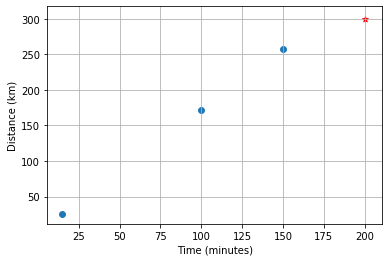

In [3]:
from matplotlib import pyplot as plt

t = [15, 100, 150]
s = [25.75, 171.7, 257.7]

t_ex = [200]
s_ex = [300]

plt.scatter(t, s, marker="o", s=35)
plt.scatter(t_ex, s_ex, marker="*", s=35, color="red")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (km)")
plt.grid(True)
plt.show()

Given two samples of the car travelled distance $s_1$ and $s_2$ taken at two different times $t_1$ and $t_2$ you can linearly interpolate to find your position at different times using the following relations:

$$s(t) = (1 - w)\cdot s_1 + w \cdot s_2~~~~~~~~~(\textrm{with}~w = \frac{t - t_1}{t_2 - t_1})$$
($t$ generic time at which we want to know the distance $s$)

***Derivation***
The equation of a line for two points $(t_1, s_1)$ and $(t_2, s_2)$ can be written as:

$$\cfrac{t - t_1}{t_2 - t_1} = \cfrac{s - s_1}{s_2 - s_1}$$

Setting $w = \cfrac{t - t_1}{t_2 - t_1}$ and solving for $s$ we find the desired solution:

$$(s_2 - s_1)\cdot w = s - s_1~~~\Rightarrow~~~s(t) = (1 - w)\cdot s_1 + w \cdot s_2$$

This formula can also be understood as a weighted average. The weights are inversely related to the distance from the end points to the unknown point; the closer point has more influence than the farther point. Thus, the weights are $(w_1 = (1 - w) = \cfrac{t_2 - t}{t_2 - t_1}; w_2 = w)$, which are normalized distances between the unknown point and each of the end points.

Back to our example, if $s_1 = 25.75~\mathrm{km}\;(@t_1 = 15~\mathrm{min})$ and $s_2 = 171.7~\mathrm{km}\;(@t_2 = 100~\mathrm{min})$ let's compute:

In [26]:
# let's find distance travelled in 1 hour (interpolation)

def my_interpolation(t, p1, p2):
    w = (t - p1[0])/(p2[0] - p1[0])
    s = (1 - w)*p1[1] + w * p2[1]
    return s
    
# p1 = (t1, s1)
t = 60
p1 = (15, 25.75)
p2 = (100, 171.7)

print ("Distance travelled in {} min.: {:.2f} km".format(t, my_interpolation(t, p1, p2)))

Distance travelled in 60 min.: 103.02 km


If we believe the relation between our variable stays the same, we can use the same formula to extrapolate values outside our initial sample.

For example if we keep the same constant velocity in our trip we could check:

In [27]:
# distance travelled in a 3 hour trip (extrapolation)
t = 180

print ("Distance travelled in {} min.: {:.2f} km".format(t, my_interpolation(t, p1, p2)))

Distance travelled in 180 min.: 309.06 km


### Log-linear interpolation

When the function $f$ that we want to interpolate is an exponential we can fall back to the previous case by a simple variable transformation. 

$$p = \mathrm{exp}(c \cdot h)$$

$$s = \mathrm{log}(p) = \mathrm{log}(\mathrm{exp}(c \cdot h)) = c \cdot h$$

$$w = \frac{h - h_1}{h_2 - h_1}$$

$$s = (1 - w)\cdot s_1 + w \cdot s_2\;\;(\mathrm{remember \;now }\;s = \mathrm{log}(p))$$

$$p = \mathrm{exp}(s)$$

#### Example 2

Atmospheric pressure decreases with the altitude (i.e. the highest I flight the lower is the pressure) following an exponential law:

$$p = p_0\cdot e^{-\alpha h}$$

where

* $h$ is the altitude
* $p_0$ is the pressure at sea level
* $\alpha$ is a constant

Taking the logarithm of each side of the equation I get a linear relation which can be interpolated as before:

$$s = \mathrm{log}(p) = \mathrm{log}(p_0\cdot e^{-\alpha h})\propto - \alpha \cdot h$$

Now assume that we have measured $p_1 = 90~\mathrm{kPa}\;(h_1 = 1000~\mathrm{m})$ and $p_2 = 40~\mathrm{kPa}\;(h_1 = 7000~\mathrm{m})$ what will be the atmospheric pressure on top of the Mont Blanc ($4812~\mathrm{m}$) ? and on top of Mount Everest ($8848~\mathrm{m}$) ? 

In [30]:
# pressure on top of the Mont Blanc (interpolation)
from math import log, exp

h = 4812
p1 = (1000, log(90))
p2 = (7000, log(40))

print ("Pressure at {} m: {:.2f} kPa".format(h, exp(my_interpolation(h, p1, p2))))

Pressure at 4812 m: 53.76 kPa


In [31]:
# pressure on top of the Mount Everest (extrapolation)

h = 8848
print ("Pressure at {} m: {:.2f} kPa".format(h, exp(my_interpolation(h, p1, p2))))

Pressure at 8848 m: 31.16 kPa


![Atmospheric pressure versus altitude (wikipedia). Green points represent our measurements, red points represent interpolation/extrapolation.](Atmospheric_Pressure_vs._Altitude.png)

### Limitations of Linear Interpolation

Interpolation is just an approximation and works well when either the function $f$ is linear or we are trying to interpolate between two points that are close enough to believe that $f$ is *almost* linear in that interval.
It can be easily demonstrated that the approximation between two points on a given function gets worse with the second derivative of the function that is approximated. This is intuitively correct: the "curvier" the function is, the worse the approximations made with simple linear interpolation become.

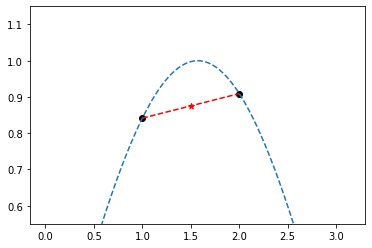

In [34]:
import numpy as np
from matplotlib import pyplot as plt

x = [1, 2]
y = np.sin(x)

xi = 1.5
z = np.interp(xi, x, y)
xs = np.arange(0,np.pi, 0.01)
plt.plot(xs, np.sin(xs), linestyle="--")
plt.plot([1,1.5,2], [y[0], z, y[1]], linestyle="--", color="red")
plt.scatter(x, y, marker="o", color="black")
plt.scatter(xi, z, marker="*", color="red")
plt.ylim(0.55, 1.15)
plt.show()

To improve the approximation accuracy with complicated curves a polynomial of higher order can be used $(p(x) = a_0 + a_1 x + a_2 x^2 + \ldots$), for example in the evaluation of the natural logarithm and trigonometric functions. It has to be clear however that going to higher degrees does not always help (for those interested [see Runge's phenomenon](https://en.wikipedia.org/wiki/Runge%27s_phenomenon)).

## Discount curve interpolation

Finally we can come back to finance and using what we have just learnt try to write a function which interpolates some given discount factors.

Needed data:

* a list of pillars dates specifying the value dates of the given discount factors, $t_0,...,t_{n-1}$
* a list of given discount factors, $D(t_0),...,D(t_{n-1})$
* a pricing date ('today' date) which corresponds to $t=0$

The input argument to the function will be the value date at which we want to interpolate the discount factor.

Since the discount factor can be expresses as $D=e^{-r(T-t)}$ the function will use a log-linear interpolation to return the value we are looking for.
More technically we can say that we are doing a linear interpolation over time in the log space.

So applying the same steps as before we get:

$$d(t_i):=\mathrm{ln}(D(t_i))$$

$$d(t) = (1-w)d(t_i) + wd(t_{i+1});\;\;\;w=\frac{t-t_i}{t_{i+1}-t_i}$$

$$D(t) = \mathrm{exp}(d(t))$$

where $i$ is such that $t_i \le t \le t_{i+1}$

Instead of reinventing the wheel and perform the interpolation with our own code, we'll use the function `interp` provided by the module `numpy`. So first let's try it with some simple examples:

In [35]:
# the numpy.interp function linearly interpolates
import numpy as np

xp = [1, 3, 7]
yp = [2, 6, 12]

print (np.interp(4, xp, yp))

7.5


In [44]:
# define the df function
def df(d, pillar_dates, discount_factors):
    log_discount_factors = [log(x) for x in discount_factors]
    interpolated = np.interp(d, pillar_dates, log_discount_factors)
    return exp(interpolated)

pillar_dates = [date.today(), date(2021, 4, 15), date(2021, 10, 15)]
discount_factors = [1, 0.95, 0.72]
print (df(date(2020, 12, 25), pillar_dates, discount_factors))

TypeError: df() missing 1 required positional argument: 'discount_factors'

This is almost OK, **but it won't work** because ```numpy.interp``` only accepts numbers/lists of numbers as arguments i.e. it doesn't automatically convert or interpret dates as numbers in any way, so it doesn't know how to interpolate them.
So we need to do the conversion ourselves before passing the data into the ```numpy.interp``` function.

In [45]:
# corrected function
def df(d, observation_date, pillar_dates, discount_factors):
    log_discount_factors = [log(x) for x in discount_factors]
    converted_pillars = [(d_i - observation_date).days for d_i in pillar_dates]
    converted_d = (d - observation_date).days
    interpolated = np.interp(converted_d, converted_pillars, log_discount_factors)
    return exp(interpolated)

0.9792107158936496


In [49]:
# now we can use the df function to get discount factors
# on value dates between the given pillar dates
observation_date = date.today()
pillar_dates = [date.today(), date(2021, 4, 15), date(2021, 10, 15)]
discount_factors = [1, 0.95, 0.72]

df_date = date(2020, 12, 25)
df0 = df(df_date, observation_date, pillar_dates, discount_factors)
print (df0)

0.9792107158936496


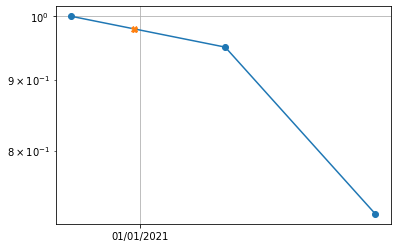

In [50]:
# let's see what these look like when plotted on a semi‐log graph
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

plt.semilogy(pillar_dates, discount_factors, marker='o')
plt.semilogy(df_date, df0 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

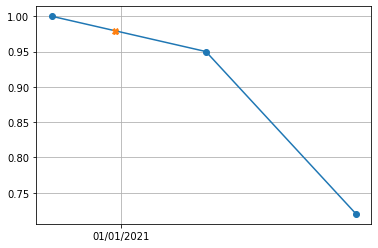

In [51]:
# let's see what these look like when plotted on a linear graph

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
plt.plot(pillar_dates, discount_factors, marker='o')
plt.plot(df_date,df0 , marker='X')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()

# Forward Rates

## Calculating Forward Rates

Last week we wrote a function called `df` for calculating a discount factor at any date, given a set of discount factors each relative to a corresponding pillar date, using log-linear interpolation. Now we want a function to compute forward rates.

The formula to calculate the forward rates can be found exploiting the property that investing at rate $r_1$ for the period $(0, T_1)$ and then *reinvesting* at rate $r_{1,2}$ for the time period $(T_1, T_2)$ is equivalent to invest at rate $r_2$ for the time period $(0, T_2)$ (i.e. no arbitrage condition, two investors shouldn't be able to earn money from arbitraging between different interest periods). That said:

$$(1+r_1 T_1)(1+r_{1,2}(T_2 - T_1)) = 1 + r_2 T_2$$

Solving for $r_{1,2}$ leads to

$$F(T_1, T_2) = r_{1,2} = \frac{1}{T_2-T_1}\Big(\frac{D(T_1)}{D(T_2)} - 1 \Big)~~~~\textrm{(where $D{(T_i)}=\frac{1}{1+r_iT_{i}}$)}$$

In [54]:
observation_date = date (2019, 1, 1)

pillar_dates = [date(2019 , 1 ,1), 
                date(2020, 1, 1), 
                date(2021, 10 ,1)]
discount_factors = [1.0, 0.97, 0.72]

def forward_rate(t1, t2, observation_date, pillar_dates, discount_factors):
    return 365.0/(t2-t1).days * (df(t1, observation_date, pillar_dates, discount_factors) / 
                                 df(t2, observation_date, pillar_dates, discount_factors) - 1)

forward_rate(date(2019, 2, 1), date(2019, 8, 1), 
             observation_date, pillar_dates, discount_factors)

0.0306904045182785

### 2008 Financial Crisis

Looking at the historical series of the Euribor (6M) rate versus the Eonia Overnight Indexed Swap (OIS-6M) rate over  the time interval 2006-2011 it becomes apparent how before August 2007 the two rates display strictly overlapping trends differing of no more than 6 bps. 

![](credit_crunch.png)

In August 2007 however we observe a sudden increase of the Euribor rate and a simultaneous decrease of the OIS rate  that leads to the explosion of the corresponding basis spread, touching the peak of 222 bps in October 2008, when Lehman Brothers filed for bankruptcy protection. Successively the basis has sensibly reduced and stabilized between  40 bps and 60 bps (notice that the pre-crisis level has never been recovered). The same effect is observed for other similar couples, e.g. Euribor 3M vs OIS 3M. 

The reason of the abrupt divergence between the Euribor and OIS rates can be explained by considering both the monetary policy decisions adopted by international authorities in response to the financial turmoil, and the impact of the credit crunch on the credit and liquidity risk perception of the market, coupled with the different financial meaning and dynamics of these rates. 

As a practial result, after the 2008 financial crisis, it is not possible anymore to use a single discount curve to correctly price forward rates of all tenors. For example, if we want to calculate the net present value of a forward 6-month libor coupon, we need to simultaneously use two different discount curves:

* the 6-month libor curve for determining the forward rate
* the EONIA curve for discounting the expected cash flow

Essentially we will hav to implement the following calculation:

$$\mathrm{NPV} = D_{\mathrm{EONIA}}(T_1) \times \frac{1}{T_2-T_1}\Big(\frac{D_{\mathrm{LIBOR}}(T_1)}{D_{\mathrm{LIBOR}}(T_2)} - 1 \Big)$$

Try to write a ```DiscountCurve``` class which contains the pillar dates and pillar discount factors as attributes and which has methods for calculating the discount factor and forward rate at arbitrary dates.

#### Hint:

```python
# here goes import statement of the needed modules
import ABCD
from XYZ import xyz

# usually classes have CamelCase naming convention
class DiscountCurve:

    # the special __init__ method defines 
    # how to construct instances of the class
    # so you need to identify the attributes you need to store 
    # in the class defining a discount curve
    def __init__(self, ...):

    # then we want to add a method to compute the discount
    # factor at an arbitrary value date 
    # using the data stored in the instance
    def df(self, param1, param2, ...):
      # the implementation can follow what we did in the 
      # function we wrote last week but this time has to 
      # use the class attributes
      
    # finally we want a method to calculates the forward rate 
    # based on the discount curve data stored in the instance
    def forward_rate(self, param1, param2, ...):
        # here of course we can use the df method 
        # implemented above to calculate the forward rate
```

In [60]:
class Student(Person):
    def __init__(self, name, birthday, school):
        Person.__init__(self, name, birthday)
        self.grade = school
        self.votes = {}
        
    def addVote(self, subject, vote):
        self.votes[subject] = vote
        
    def average(self):
        print ("List of votes")
        print ("-------------")
        for k, v in self.votes.items():
            print ("{}: {}".format(k, v))
            
        avg = sum(self.votes.values())/len(self.votes)
        print ("-------------")
        print ("Avg: {:.1f}".format(avg))